<a href="https://colab.research.google.com/github/kanyijohn/Deep-Learning-ML-models/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# 1. LOADING AND PREPEOCESSING CIFAR-10 DATASET- It has dataset has 10 classes:
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values (0-255) to (0-1) to make training more efficient.
x_train, x_test = x_train / 255.0, x_test / 255.0

# Check data shape(image no, pixel dimensions and color scheme)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [14]:
# 2.CREATING THE CNN MODEL USING TENSORFLOW'S KERAS SEQUENTIAL API.

model = keras.Sequential([ # A Sequential model (CNN model), to make the layers get stacked one after another.


    # Layer 1- Convulational Layer (identifies and extracts the image features)

    layers.Conv2D (32, (3, 3), # Adds a convolutional layer with 32 filters, each 3×3 in size.
                  activation='relu', # Applies ReLU (Rectified Linear Unit) activation to introduce non-linearity
                  input_shape=(32, 32, 3)), # Defines the input image dimensions (32×32 pixels, 3 color channels).


    # Layer 2- Max Pooling (Pooling layer-downsamples data features to reduce overfitting and computational costs)

    layers.MaxPooling2D((2, 2)), # Performs downsampling using 2×2 max pooling to reduce spatial dimensions by half (32×32 → 16×16).

    # Second Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'), # 64 filters of size 3×3. Extracts higher-level features from the images.

    # Second Max Pooling
    layers.MaxPooling2D((2, 2)), # reduces the feature map size (16×16 → 8×8).

    # Third Convulational Layer
    layers.Conv2D(128, (3, 3), activation='relu'), # A deeper convolutional layer with 128 filters helping the network capture complex patterns in the images.

    # Flattening the Output
    layers.Flatten(), # Converts the multi-dimensional feature maps into a one-dimensional vector. Needed to connect the output to fully connected layers.


    # Layer 3- Fully Connected Dense Layer (connected convulated layers with same number of units as the number of classes and the output activation function such as “softmax” or “sigmoid”)

    # A fully connected layer with 128 neurons and Activation = ReLU to introduce non-linearity.
    layers.Dense(128, activation='relu'),

    # Output Layer- Output layer with 10 neurons, one for each class. Activation = Softmax: Converts outputs into probabilities
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

# 3. COMPILING THE MDOEL
model.compile(optimizer='adam', # Optimizer: Adam - Efficient and adaptive optimization algorithm.
              loss='sparse_categorical_crossentropy', # Used for multi-class classification when labels are integer values.
              metrics=['accuracy']) # Measures the percentage of correctly classified images.


In [15]:
# 4. TRAINING THE MODEL
history = model.fit(x_train, y_train, epochs=10, # Trains the model for 10 epochs (iterations over the full dataset).
                    validation_data=(x_test, y_test)) # Uses validation data (x_test, y_test) to monitor performance.

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 45ms/step - accuracy: 0.3849 - loss: 1.6714 - val_accuracy: 0.5739 - val_loss: 1.1992
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.6156 - loss: 1.0983 - val_accuracy: 0.6529 - val_loss: 0.9914
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.6865 - loss: 0.8991 - val_accuracy: 0.6721 - val_loss: 0.9301
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.7356 - loss: 0.7689 - val_accuracy: 0.6920 - val_loss: 0.8946
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.7638 - loss: 0.6772 - val_accuracy: 0.7060 - val_loss: 0.8784
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.7936 - loss: 0.5820 - val_accuracy: 0.7181 - val_loss: 0.8355
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.8220 - loss: 0.5090 - val_accuracy: 0.7049 - val_loss: 0.9089
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.8460 -

In [17]:
# 5. EVALUATING THE MODEL- Evaluate the model's accuracy on unseen test data.
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7238 - loss: 0.9644
Test Accuracy: 71.86%


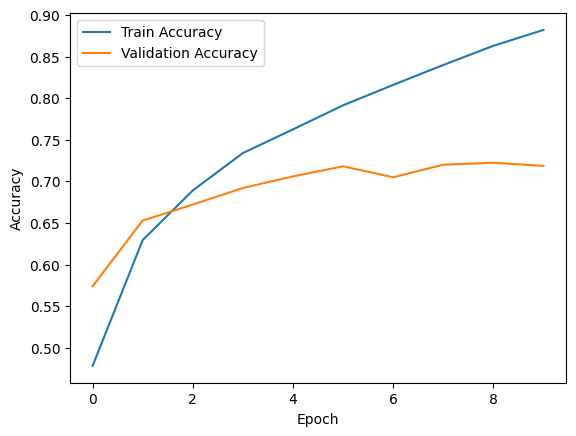

In [18]:
# Visualizing the perfomance- Plots accuracy over epochs to observe the training progress and helps detect overfitting (when training accuracy is high but validation accuracy is low).

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()